Converting 6 data sets into merged dataset

Merge All the data

In [1]:
import pandas as pd
import ast
import os
import re

#list of file name
path="DATA SET\\"
file_names=[ "bangalore_cars.xlsx","chennai_cars.xlsx","delhi_cars.xlsx","hyderabad_cars.xlsx","jaipur_cars.xlsx",
           "kolkata_cars.xlsx"]

dfs=[] # empty list

for file in file_names:
    df = pd.read_excel(f"{path}{file}")
    state = file.split("_")[0]
    df['state'] = state

    dfs.append(df)

merged_df=pd.concat(dfs, ignore_index=True)

print(" Files merged successfully")

 Files merged successfully


In [2]:
merged_df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,state
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
...,...,...,...,...,...,...
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,kolkata
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,kolkata
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,kolkata
8367,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,kolkata


In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_car_detail    8369 non-null   object
 1   new_car_overview  8369 non-null   object
 2   new_car_feature   8369 non-null   object
 3   new_car_specs     8369 non-null   object
 4   car_links         8369 non-null   object
 5   state             8369 non-null   object
dtypes: object(6)
memory usage: 392.4+ KB


Converting Unstructured Format of Data to a Structured Format 

Function Extract the Columns

In [4]:
#converting string representations into dictionaries
def convert_to_dic(row):
    try:
        a = ast.literal_eval(row)
        return a
    except ValueError:
        return None
    
#consolidates a list of dictionaries into a single DataFrame
    
def first(cardata):
    df = {}
    for row in cardata:
        for key in row:
            if key not in df:
                df[key]=[]
            df[key].append(row[key])
    df = pd.DataFrame(df)
    return df

# Extracting the key and value
def top(cardata):#Extracts key-value pairs from the "top" section of each dictionary in cardata.
        def extract_key_value_pairs(b):
            flat_dict={}
            try:
                if "top" in b:
                    for item in b["top"]:
                        key= item.get("key")
                        value=item.get("value")
                
                        if key:
                            flat_dict[key]=value  # Use key as column name and value as entry

            except:
                pass
            return flat_dict
        flattened_data = [extract_key_value_pairs(b) for b in cardata if b is not None]
        df = pd.DataFrame(flattened_data)
        return df

def data(cardata):
    def extract_key_value_pairs(b):
        flat_dict = {}
        try:
            # Proceed only if 'data' exists in the dictionary
            if b is not None and 'data' in b:
                for section in b['data']:
                    if 'list' in section:
                        for item in section['list']:
                            key = item.get('key')  # Using .get to avoid KeyError
                            value = item.get('value')
                            if key and value:  # Ensure both key and value exist
                                flat_dict[key] = value
                                
        except Exception as e:
            # Log or handle exception if needed
            print(f"Error processing row: {e}")
        return flat_dict

    # Filter out None entries
    flattened_data = [extract_key_value_pairs(b) for b in cardata if b is not None]
    df = pd.DataFrame(flattened_data)
    return df

Extract the Columns

In [5]:
#car_columns contains columns with nested data
car_columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']


#Converts all string representations in the specified columns to dictionaries using the convert_to_dic function.
for columns in car_columns:
    merged_df[columns] = merged_df[columns].apply(convert_to_dic)

finaldf=pd.DataFrame()

c=pd.DataFrame()

for i in car_columns:
    d = first(merged_df[i]) #Extracts key-value pairs into a DataFrame from the dictionaries.

    if d is None:
        continue
    columns = d.columns

    if "top" in columns:
        d = top(merged_df[i])

    if "data" in columns:
        c = data(merged_df[i])
    #Processes columns containing "top" or "data" keys, respectively, extracting and flattening them into structured data.

    finaldf=pd.concat([finaldf,d], axis=1, ignore_index=False)

    if not c.empty:
        finaldf=pd.concat([finaldf,c], axis=1, ignore_index=False)

finaldf["city"]=merged_df["state"]
finaldf["car_links"]=merged_df["car_links"]#Appends contextual information (state as city and car_links) to the final DataFrame.

In [6]:
pd.set_option('display.max_columns', None)
finaldf

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Mileage,Engine,Max Power,Torque,Seats,Wheel Size,Color,Engine Type,Displacement,Max Power,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Alloy Wheel Size,Ground Clearance Unladen,city,car_links
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0,23.1 kmpl,998 CC,67.04bhp,90Nm,5,NaN,White,K10B Engine,998,67.04bhp@6000rpm,90Nm@3500rpm,3.0,4.0,DOHC,MPFi,73 X 82 mm,11.0:1,No,No,3715mm,1635mm,1565mm,2425mm,1420mm,1410mm,835kg,1250kg,5 Speed,FWD,5,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,bangalore,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Feb 2018,Comprehensive,Petrol,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,Manual,2018.0,17 kmpl,1497 CC,121.31bhp,150Nm,5,16,White,Ti-VCT Petrol Engine,1497,121.31bhp@6500rpm,150Nm@4500rpm,3.0,4.0,DOHC,Direct Injection,79 X 76.5 mm,11.0:1,No,No,3998mm,1765mm,1647mm,2519mm,NaN,NaN,1242Kg,1660Kg,5 Speed,FWD,5,Power,5.3 metres,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4,352-litres,16,NaN,bangalore,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Sept 2018,Comprehensive,Petrol,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,Manual,2018.0,23.84 kmpl,1199 CC,84bhp,114Nm,5,14,Red,Revotron Engine,1199,84bhp@6000rpm,114Nm@3500rpm,3.0,4.0,DOHC,MPFi,77 X 85.8 mm,10.8:1,No,No,3746mm,1647mm,1535mm,2400mm,1400mm,1420mm,1012kg,NaN,5 Speed,FWD,5,Power,4.9 meters,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,NaN,bangalore,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Dec 2014,Comprehensive,Petrol,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,Manual,2014.0,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5,14,Others,Kappa VTVT Petrol Engine,1197,81.86bhp@6000rpm,113.75Nm@4000rpm,4.0,4.0,DOHC,Direct Injection,NaN,NaN,No,No,3995mm,1660mm,1520mm,2425mm,1479mm,1493mm,1180,NaN,5 Speed,FWD,5,Power,4.7 metres,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,NaN,bangalore,https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2015,Third Party insurance,Diesel,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,Manual,2015.0,23.65 kmpl,1248 CC,88.5bhp,200Nm,5,16,Gray,DDiS 200 Diesel Engine,1248,88.5bhp@4000rpm,200Nm@1750rpm,4.0,4.0,DOHC,NaN,69.6 x 82 mm,NaN,Yes,No,4300mm,1785mm,1595mm,2600mm,NaN,NaN,1230Kg,1670kg,5 Speed,FWD,5,Power,5.2 meters,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,NaN,bangalore,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [9]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   it                        8369 non-null   int64  
 1   ft                        8369 non-null   object 
 2   bt                        8369 non-null   object 
 3   km                        8369 non-null   object 
 4   transmission              8369 non-null   object 
 5   ownerNo                   8369 non-null   int64  
 6   owner                     8369 non-null   object 
 7   oem                       8369 non-null   object 
 8   model                     8369 non-null   object 
 9   modelYear                 8369 non-null   int64  
 10  centralVariantId          8369 non-null   int64  
 11  variantName               8369 non-null   object 
 12  price                     8369 non-null   object 
 13  priceActual               8369 non-null   object 
 14  priceSav

Data Cleaning, preprocesses, and standardizes data in a DataFrame

In [10]:
# Import necessary libraries
import re
import numpy as np
import pandas as pd

# Create a copy of the final dataframe
df = finaldf.copy()

df_columns = df.columns
for i,k in df.isna().sum().items():
    if k >= 300:
        df.drop(i, axis=1, inplace=True)
df_columns_1 = df.columns
print(len(df_columns),len(df_columns_1))

df_1 = pd.DataFrame(df['Max Power'])
df_1.columns = ['Max Power (bhp)', 'Max Power (bhp@rpm)']
df = df.drop(columns=["Max Power"])
df['Max Power'] = df_1['Max Power (bhp)']


conversion_factor = 1.39
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '') 
df['Mileage'] = df['Mileage'].apply(lambda x: float(x.replace(' km/kg', '')) * conversion_factor if 'km/kg' in str(x) else float(x))
df['Mileage'] = df['Mileage'].astype(float)

def extract_integer(value):
    result = re.findall(r'\d+', str(value))
    return int(result[0]) if result else None


df['km'] = df['km'].str.replace(',', '').astype(int)

df = df.drop(["priceActual","priceSaving","Year of Manufacture","Seats","Fuel Type","trendingText","owner","Ownership","Kms Driven","transmission",'Engine Displacement','Displacement','Max Torque',"car_links",'centralVariantId','No Door Numbers'], axis=1)

df['Insurance Validity'] = df['Insurance Validity'].replace({
    'Third Party insurance': 'Third Party',
    '1': 'Not Available',
    '2': 'Not Available',
})

df['Gear Box'] = df['Gear Box'].str.strip()
df['Gear Box'] = df['Gear Box'].replace({
    '5-Speed': '5 Speed', '5-Speed`': '5 Speed', '5-Speed ': '5 Speed',
    '5 speed': '5 Speed', '5-Speed ': '5 Speed',
    'Six Speed Manual': '6 Speed', 'Six Speed': '6 Speed', '6-Speed': '6 Speed',
    '6-Speed IVT': '6 Speed IVT', 'Six Speed Automatic Transmission': '6 Speed',
    '6Speed': '6 Speed', 'Six Speed  Gearbox': '6 Speed', '6-speed': '6 Speed',
    'Five Speed': '5 Speed', 'Five Speed Manual': '5 Speed',
    'Five Speed Manual Transmission': '5 Speed', 'Five Speed Manual Transmission Gearbox': '5 Speed',
    '7-Speed': '7 Speed', '7-speed': '7 Speed',
    'Seven Speed': '7 Speed', '7-speed PDK': '7 Speed',
    '7G-DCT': '7 Speed DCT', '7-Speed DCT': '7 Speed DCT',
    '8-Speed': '8 Speed', '8-speed': '8 Speed',
    '8Speed': '8 Speed', '8-Speed DCT': '8 Speed',
    '9-Speed': '9 Speed', '9-speed': '9 Speed',
    '10-speed': '10 Speed',
    'Fully Automatic': 'Automatic', 'Single-speed transmission': 'Single Speed',
    'Single speed reduction gear': 'Single Speed', 'Single Speed': 'Single Speed',
    'SPEEDSHIFT TCT 9G': '9 Speed', '9G-TRONIC': '9 Speed',
    '9G TRONIC': '9 Speed', '9G-TRONIC automatic': '9 Speed',
    'AGS': 'Automatic', 'IVT': 'IVT', 'E-CVT': 'CVT', 'eCVT': 'CVT',
    'AMG SPEEDSHIFT DCT 8G': '8 Speed DCT', 'AMG 7-SPEED DCT': '7 Speed DCT',
    '10 Speed': '10 Speed'
})

df['Engine'] = df['Engine'].str.replace(' CC', '').astype(float)

df['Max Power'] = df['Max Power'].apply(extract_integer)

df['Torque'] = df['Torque'].apply(extract_integer)

df['Length'] = df['Length'].apply(extract_integer)

df['Width'] = df['Width'].apply(extract_integer)

df['Wheel Base'] = df['Wheel Base'].apply(extract_integer)

df['Height'] = df['Height'].apply(extract_integer)

df['Kerb Weight'] = df['Kerb Weight'].apply(extract_integer)
df['Kerb Weight'] = df['Kerb Weight'].fillna(df['Kerb Weight'].mean())

df['Registration Year'] = df['Registration Year'].apply(extract_integer)

df['Tyre Type'] = df['Tyre Type'].str.strip()
df['Tyre Type'] = df['Tyre Type'].replace({
    'Tubeless, Radial': 'Tubeless Radial', 'Tubeless,Radial': 'Tubeless Radial', 
    'Radial, Tubless': 'Tubeless Radial', 'Radial, Tubeless': 'Tubeless Radial',
    'Tubeless Radial Tyres': 'Tubeless Radial', 'Tubless, Radial': 'Tubeless Radial',
    'Radial,Tubeless': 'Tubeless Radial', 'Tubeless,Radials': 'Tubeless Radial',
    'Tubeless, Runflat': 'Tubeless Runflat', 'Tubeless. Runflat': 'Tubeless Runflat',
    'Runflat Tyres': 'Runflat', 'Runflat Tyre': 'Runflat', 'Runflat,Radial': 'Runflat Radial',
    'Run-Flat': 'Runflat', 'Radial with tube': 'Radial Tube',
    'Radial Tubeless': 'Tubeless Radial', 'Tubeless Radials Tyre': 'Tubeless Radial',
    'Tubeless ': 'Tubeless', 'Radial ': 'Radial', 
    'tubeless tyre': 'Tubeless', 'Tubeless Tyre': 'Tubeless',
    'Tubeless Tyres': 'Tubeless', 'Radial Tyres': 'Radial',
    'Tubeless Tyres, Radial': 'Tubeless Radial', 'Tubeless,Radial ': 'Tubeless Radial',
    'Tubeless Tyres Mud Terrain': 'Tubeless Mud Terrain',
    'Tubeless Tyres All Terrain': 'Tubeless All Terrain',
    'Tubeless Radials': 'Tubeless Radial','Tubeless,Runflat': 'Tubeless Runflat',
    'Tubless,Radial': 'Tubeless Radial', 'Radial Tube': 'Radial', 'Tubeless, Radials': 'Tubeless Radial'
    
})

def clean_price(price):
    price = price.replace(',', '').replace('₹', '').strip()
    try:
        if 'Lakh' in price:
            price = float(price.replace('Lakh', '').strip()) * 100000
        elif 'Crore' in price:
            price = float(price.replace('Crore', '').strip()) * 10000000
        else:
            price = float(price)
    except ValueError:
        return None
    return price
df['price'] = df['price'].apply(clean_price)
df['price'] = df['price'].astype(int)


categorical_columns = [
 "ft","bt","ownerNo","oem","model","modelYear",
 "Registration Year","Insurance Validity","Transmission",
 "Engine","Color","Engine Type","No of Cylinder", "Values per Cylinder",
 "Gear Box","Seating Capacity","Steering Type","Front Brake Type",
 "Rear Brake Type","Tyre Type","city"]

Numerical_columns = ["it","km","Mileage","Torque","Length","Width","Height","Wheel Base","Kerb Weight","Max Power"]

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in Numerical_columns:
    df[col] = df[col].fillna(df[col].mean())


70 51


In [11]:
print(df.columns)

Index(['it', 'ft', 'bt', 'km', 'ownerNo', 'oem', 'model', 'modelYear',
       'variantName', 'price', 'Registration Year', 'Insurance Validity',
       'Transmission', 'Mileage', 'Engine', 'Torque', 'Color', 'Engine Type',
       'No of Cylinder', 'Values per Cylinder', 'Length', 'Width', 'Height',
       'Wheel Base', 'Kerb Weight', 'Gear Box', 'Seating Capacity',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',
       'city', 'Max Power'],
      dtype='object')


Data Preprocessing

In [22]:
#The OneHotEncoding_columns list specifies categorical columns that will be transformed 
# into binary indicator variables for each unique category in the column.
OneHotEncoding_columns = [
    'ft', 'bt', 'oem', 'model', 'Insurance Validity', 'Transmission',
    'Color', 'Engine Type', 'Gear Box', 'Steering Type', 
    'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'city','variantName']


#The label_encoding_columns list identifies ordinal or discrete variables 
# that can be converted to numerical values via label encoding.
label_encoding_columns = [
    'Engine', 'No of Cylinder', 'Values per Cylinder', 
    'Seating Capacity', 'ownerNo', 
    'modelYear', 'Registration Year']

numerical_columns = [
    "it","km", "Mileage", "Torque", "Length", "Width", "Height",
    "Wheel Base", "Kerb Weight", "Max Power"]

drop_columns = []

#Separates the independent variables (X) and dependent variable (y).
X = df.drop(columns=['price']) #X: All columns except price (features for training)
y = df['price'] #y: The price column (target variable for prediction)

<Axes: xlabel='price', ylabel='Count'>

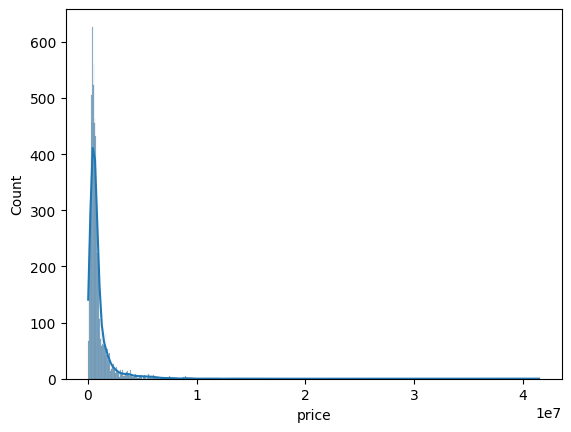

In [13]:
import seaborn as sns
sns.histplot(df['price'], kde=True)

<Axes: xlabel='Transmission', ylabel='price'>

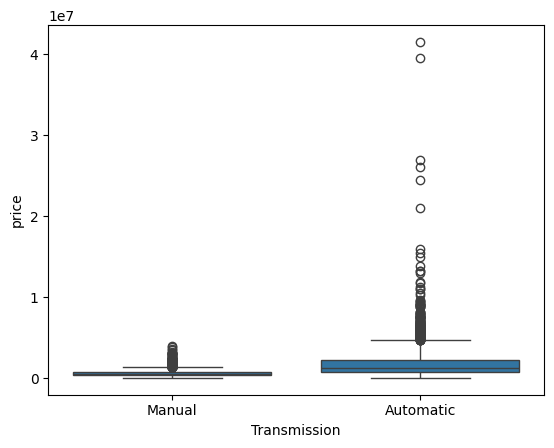

In [14]:
sns.boxplot(x='Transmission', y='price', data=df)

Low variance threshold

In [23]:
numerical_column = X[numerical_columns]

variance = numerical_column.var()#Variance indicates the spread of data. If it is 0, all values in the column are identical.

low_variance_columns = variance[variance == 0].index.tolist()

print("Columns with low variance (variance = 0):", low_variance_columns)

drop_columns.append(low_variance_columns[0])
numerical_columns.remove(low_variance_columns[0])

Columns with low variance (variance = 0): ['it']


correlation matrix

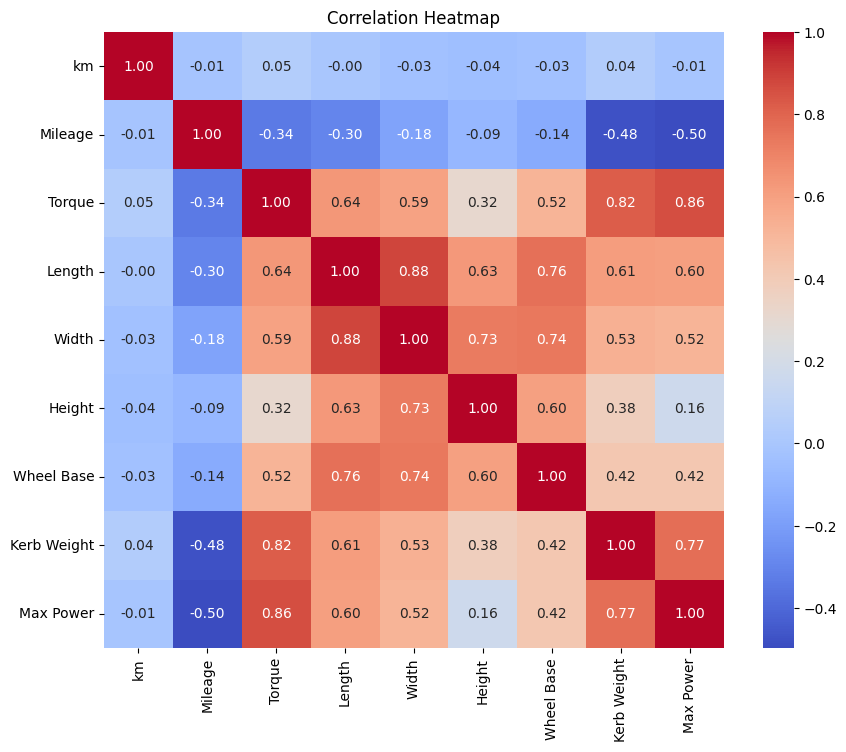

set()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = X[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr() # Compute pairwise correlations

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

numeric_df = X[numerical_columns]
corr_features = correlation(numeric_df, 0.9)

print(corr_features)
for i in corr_features:
    drop_columns.append(i)
    numerical_columns.remove(i)

correlation with price

In [ ]:
X_corr = pd.DataFrame(X[numerical_columns])

X_corr['price'] = y.values  

#Computes the correlation matrix for all numerical columns and price
correlation_with_price = X_corr[numerical_columns + ['price']].corr()['price']

print("Correlation with price:\n", correlation_with_price)

high_correlation_features = correlation_with_price[abs(correlation_with_price) < 0.1].index.tolist()
print("Highly correlated features with price (|correlation| < 0.1):", high_correlation_features)
for i in high_correlation_features:
    drop_columns.append(i)
    numerical_columns.remove(i) #Drop Low-Correlation Features

Correlation with price:
 km            -0.077351
Mileage       -0.251518
Torque         0.647847
Length         0.396359
Width          0.382184
Height         0.153339
Wheel Base     0.320852
Kerb Weight    0.551311
Max Power      0.747575
price          1.000000
Name: price, dtype: float64
Highly correlated features with price (|correlation| < 0.1): ['km']


Chi Square Test

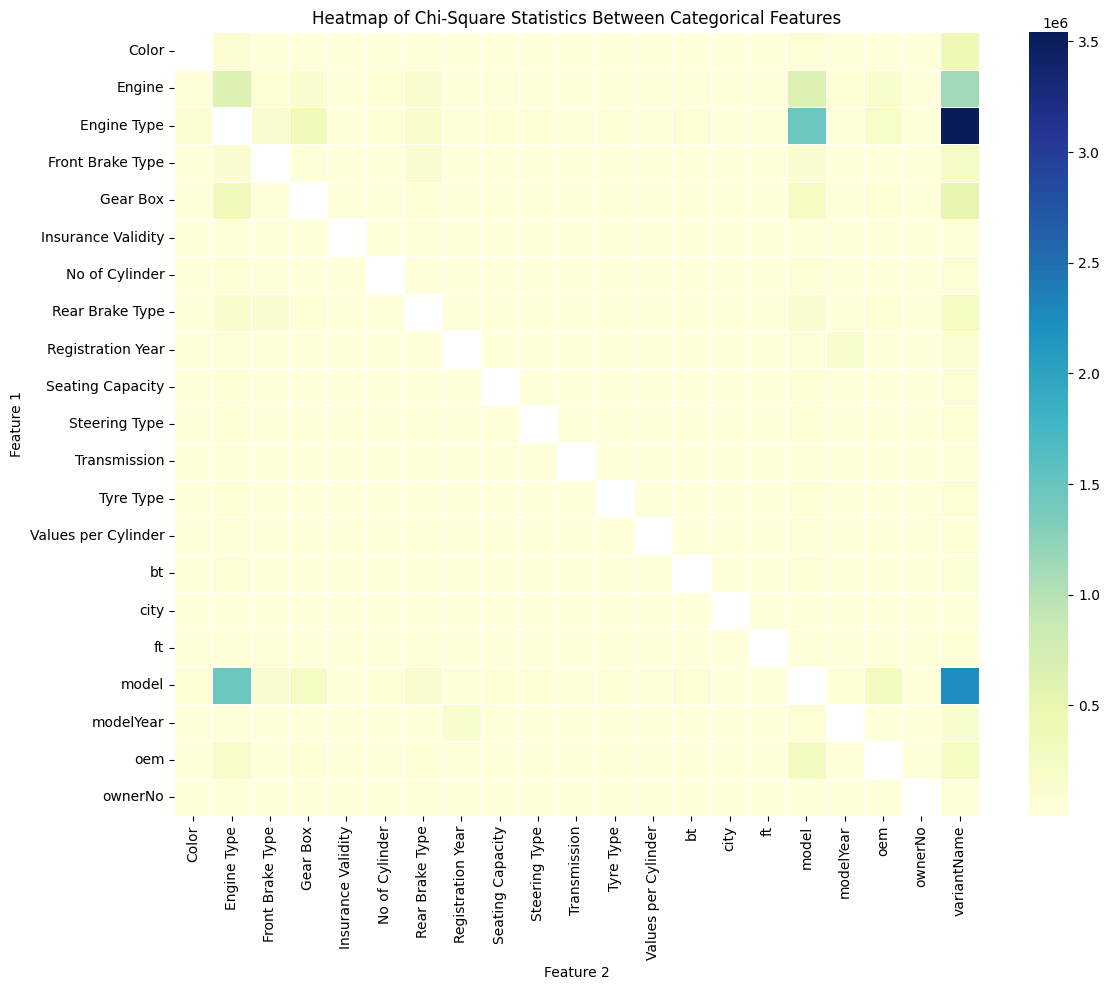

,Feature 1,Feature 2,Chi-Square Statistic,p-value
209,Engine Type,variantName,3.541003e+06,0.000000e+00
175,model,variantName,2.230738e+06,0.000000e+00
168,model,Engine Type,1.468624e+06,0.000000e+00
20,Engine,variantName,1.123329e+06,0.000000e+00
13,Engine,Engine Type,6.319538e+05,0.000000e+00
...,...,...,...,...
132,ft,Engine Type,1.439600e+04,0.000000e+00
128,ft,model,1.343968e+04,0.000000e+00
230,city,variantName,1.322463e+04,9.446248e-55
160,oem,Front Brake Type,1.197283e+04,0.000000e+00


In [ ]:
from scipy.stats import chi2_contingency
#identifies pairs of features that are highly correlated
categorical_columns = label_encoding_columns + OneHotEncoding_columns

chi_square_results = []

for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i >= j:  
            continue
        
        contingency_table = pd.crosstab(X[col1], X[col2])

        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        chi_square_results.append((col1, col2, chi2_stat, p_value))

chi_square_df = pd.DataFrame(chi_square_results, columns=['Feature 1', 'Feature 2', 'Chi-Square Statistic', 'p-value'])

pivot_table = chi_square_df.pivot(index='Feature 1', columns='Feature 2', values='Chi-Square Statistic')

pivot_table = pivot_table.fillna(pivot_table.T)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False, linewidths=0.5)
plt.title("Heatmap of Chi-Square Statistics Between Categorical Features")
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.tight_layout()
plt.show()

chi_square_threshold = 10000 

highly_correlated = chi_square_df[chi_square_df['Chi-Square Statistic'] > chi_square_threshold]

highly_correlated = highly_correlated.sort_values(by='Chi-Square Statistic', ascending=False)

highly_correlated

Drop columns based on Chi Square Test

In [27]:
drop_= ["Engine Type","model","variantName","Registration Year",'Rear Brake Type',"Front Brake Type",'Tyre Type']
for i in drop_:
    drop_columns.append(i)
    try:
        label_encoding_columns.remove(i)
    except:
        OneHotEncoding_columns.remove(i)

Anova test

In [28]:
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder

anova_results = []

for feature in label_encoding_columns:
    groups = [y[X[feature] == category] for category in X[feature].unique()]
    
    f_stat, p_value = stats.f_oneway(*groups)

    anova_results.append((feature, f_stat))

for feature in OneHotEncoding_columns:
    groups = [y[X[feature] == category] for category in X[feature].unique()]
    
    f_stat, p_value = stats.f_oneway(*groups)
    
    anova_results.append((feature, f_stat))

anova_df = pd.DataFrame(anova_results, columns=['Feature', 'F_statistic'])

anova_df = anova_df.sort_values(by='F_statistic', ascending=False)

In [29]:
top_5_features = anova_df.head(12)
last_features = anova_df[12:]
print(top_5_features['Feature'])
print(last_features['Feature'])

10          Transmission
1         No of Cylinder
8                    oem
0                 Engine
7                     bt
12              Gear Box
6                     ft
9     Insurance Validity
3       Seating Capacity
14                  city
5              modelYear
4                ownerNo
Name: Feature, dtype: object
2     Values per Cylinder
13          Steering Type
11                  Color
Name: Feature, dtype: object


In [30]:
for i in last_features['Feature']:
    print(i)
    drop_columns.append(i)
    try:
        label_encoding_columns.remove(i)
    except:
        OneHotEncoding_columns.remove(i)

Values per Cylinder
Steering Type
Color


Encoding process

In [31]:
OneHotEncoding_columns

['ft', 'bt', 'oem', 'Insurance Validity', 'Transmission', 'Gear Box', 'city']

In [32]:
label_encoding_columns

['Engine', 'No of Cylinder', 'Seating Capacity', 'ownerNo', 'modelYear']

In [33]:
import pickle
X = X.drop(columns=drop_columns)
for col in label_encoding_columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(X[col]) 
    X[col] = label_encoder.transform(X[col])
    with open(f'Models\\label_encoder_{col}.pkl', 'wb') as file:
        pickle.dump(label_encoder, file)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = pd.DataFrame(onehot_encoder.fit_transform(X_train[OneHotEncoding_columns]))
X_test_encoded = pd.DataFrame(onehot_encoder.transform(X_test[OneHotEncoding_columns]))

X_train_encoded.columns = onehot_encoder.get_feature_names_out(OneHotEncoding_columns)
X_test_encoded.columns = onehot_encoder.get_feature_names_out(OneHotEncoding_columns)

X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index

X_train = X_train.drop(columns=OneHotEncoding_columns)
X_test = X_test.drop(columns=OneHotEncoding_columns)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [36]:
X_train_scaled.head()

,ownerNo,modelYear,Mileage,Engine,Torque,No of Cylinder,Length,Width,Height,Wheel Base,Kerb Weight,Seating Capacity,Max Power,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,ft_Petrol,bt_,bt_Convertibles,bt_Coupe,bt_Hatchback,bt_MUV,bt_Minivans,bt_Pickup Trucks,bt_SUV,bt_Sedan,oem_Audi,oem_BMW,oem_Chevrolet,oem_Citroen,oem_Datsun,oem_Fiat,oem_Ford,oem_Hindustan Motors,oem_Honda,oem_Hyundai,oem_Isuzu,oem_Jaguar,oem_Jeep,oem_Kia,oem_Land Rover,oem_Lexus,oem_MG,oem_Mahindra,oem_Mahindra Renault,oem_Mahindra Ssangyong,oem_Maruti,oem_Mercedes-Benz,oem_Mini,oem_Mitsubishi,oem_Nissan,oem_Opel,oem_Porsche,oem_Renault,oem_Skoda,oem_Tata,oem_Toyota,oem_Volkswagen,oem_Volvo,Insurance Validity_Comprehensive,Insurance Validity_Not Available,Insurance Validity_Third Party,Insurance Validity_Zero Dep,Transmission_Automatic,Transmission_Manual,Gear Box_10 Speed,Gear Box_10 speed,Gear Box_10-speed Automatic,Gear Box_4 Speed,Gear Box_4-Speed,Gear Box_4-speed,Gear Box_5,Gear Box_5 Speed,Gear Box_5 Speed AT+ Paddle Shifters,Gear Box_5 Speed CVT,"Gear Box_5 Speed Forward, 1 Reverse",Gear Box_5 Speed Manual (Cable Type Gear Shift),Gear Box_5 speed manual,Gear Box_5-speed,Gear Box_6,Gear Box_6 Speed,Gear Box_6 Speed AT,Gear Box_6 Speed IMT,Gear Box_6 Speed IVT,Gear Box_6 Speed MT,Gear Box_6 Speed iMT,Gear Box_6 Speed with Sequential Shift,Gear Box_6 speed,Gear Box_6 speed automatic,Gear Box_6-Speed AT,Gear Box_6-Speed DCT,Gear Box_6-Speed IMT,Gear Box_6-Speed iMT,Gear Box_6-speed AutoSHIFT,Gear Box_6-speed CVT,Gear Box_6-speed DCT,Gear Box_6-speed IVT,Gear Box_6-speed iMT,Gear Box_7 Speed,Gear Box_7 Speed 7G-DCT,Gear Box_7 Speed CVT,Gear Box_7 Speed DCT,Gear Box_7 Speed DSG,Gear Box_7 Speed Steptronic Sport,Gear Box_7 speed,Gear Box_7-Speed DSG,Gear Box_7-Speed S-Tronic,Gear Box_7-Speed Steptronic,Gear Box_7-speed DCT,Gear Box_7-speed Stronic,Gear Box_7G DCT 7-Speed Dual Clutch Transmission,Gear Box_8,Gear Box_8 Speed,Gear Box_8 Speed CVT,Gear Box_8 Speed Sport,Gear Box_8 Speed Tiptronic,Gear Box_8 speed,Gear Box_8-Speed Automatic Transmission,Gear Box_8-Speed Steptronic,Gear Box_8-Speed Steptronic Sport Automatic Transmission,Gear Box_8-speed tiptronic,Gear Box_8G-DCT,Gear Box_9 -speed,Gear Box_9 Speed,Gear Box_9 speed Tronic,Gear Box_9-speed automatic,Gear Box_Automatic,Gear Box_CVT,Gear Box_Direct Drive,Gear Box_IVT,Gear Box_Mercedes Benz 7 Speed Automatic,Gear Box_Single Speed,Gear Box_Six Speed Automatic Gearbox,Gear Box_Six Speed Manual with Paddle Shifter,Gear Box_iMT,city_bangalore,city_chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata
3133,-0.563256,1.149268,0.002753,0.424826,-0.314046,0.366183,0.427622,0.365844,0.442199,0.294839,0.355372,-0.300098,0.185099,-0.108572,-0.682136,-0.053348,-0.040567,0.707661,-0.02445,-0.027338,-0.02995,-0.861206,-0.208531,-0.051921,-0.027338,1.666159,-0.595809,-0.137371,-0.150352,-0.096681,-0.034588,-0.093482,-0.062439,-0.196542,-0.021173,-0.342525,2.023643,-0.021173,-0.064806,-0.118038,-0.14072,-0.074547,-0.017286,-0.102791,-0.215834,-0.021173,-0.017286,-0.606631,-0.170441,-0.034588,-0.042375,-0.095891,-0.017286,-0.021173,-0.19572,-0.14127,-0.234511,-0.201409,-0.192405,-0.069301,1.306613,-0.166692,-1.144298,-0.194896,-0.617930,0.617930,-0.012222,-0.012222,-0.012222,-0.139612,-0.036689,-0.017286,-0.104265,-1.335584,-0.02445,-0.073527,-0.012222,-0.012222,-0.012222,-0.027338,-0.032352,2.154128,-0.02445,-0.032352,-0.02445,-0.012222,-0.017286,-0.017286,-0.012222,-0.012222,-0.017286,-0.027338,-0.02995,-0.054738,-0.021173,-0.027338,-0.021173,-0.02445,-0.012222,-0.185193,-0.017286,-0.02995,-0.084082,-0.02445,-0.012222,-0.012222,-0.040567,-0.056094,-0.012222,-0.032352,-0.027338,-0.02445,-0.012222,-0.181713,-0.02445,-0.02445,-0.02995,-0.021173,-0.021173,-0.06709,-0.021173,-0.012222,-0.012222,-0.012222,-0.124382,-0.034588,-0.02995,-0.042375,-0.136806,-0.017286,-0.034588,-0.012222,-0.021173,-0.012222,-0.017286,-0.032352,-0.460656,-0.452534,2.153026,-0.463749,-0.394089,-0.446291
664,1.002124,-0.379259,-0.190925,0.328014,0.57

Model Training

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42, colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.8)

models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Decision Tree': dt_model,
    'XGBoost': xgb_model
}

# Initialize a dictionary to store cross-validation scores
cv_scores = {}

# Loop through each model, perform cross-validation, and store the results
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_scores[model_name] = scores
    print(f"{model_name} CV Scores: {scores}")
    print(f"{model_name} Mean CV R² Score: {np.mean(scores)}\n")

# Find the model with the highest mean cross-validation R² score
best_model = max(cv_scores, key=lambda x: np.mean(cv_scores[x]))
best_score = np.mean(cv_scores[best_model])

print(f"Best model: {best_model} with mean R² score of {best_score}")

Linear Regression CV Scores: [-8.57903151e+24 -8.42926731e+24 -2.99556531e+24 -1.06352504e+25
 -2.49375573e+23]
Linear Regression Mean CV R² Score: -6.177698017238847e+24

Random Forest CV Scores: [0.61570667 0.92462568 0.88992281 0.86504014 0.86619993]
Random Forest Mean CV R² Score: 0.8322990463809324

Gradient Boosting CV Scores: [0.61440215 0.91378041 0.87945306 0.88363857 0.85062064]
Gradient Boosting Mean CV R² Score: 0.8283789660537171

Decision Tree CV Scores: [0.51727433 0.87197051 0.76440819 0.83489344 0.8444065 ]
Decision Tree Mean CV R² Score: 0.7665905936807846

XGBoost CV Scores: [0.63209158 0.94332516 0.85286468 0.78151715 0.87307292]
XGBoost Mean CV R² Score: 0.8165742993354798

Best model: Random Forest with mean R² score of 0.8322990463809324


In [38]:
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Test R² Score: 0.9117223991192962
Mean Absolute Error (MAE): 140618.92067287938
Root Mean Squared Error (RMSE): 513312.89015740174


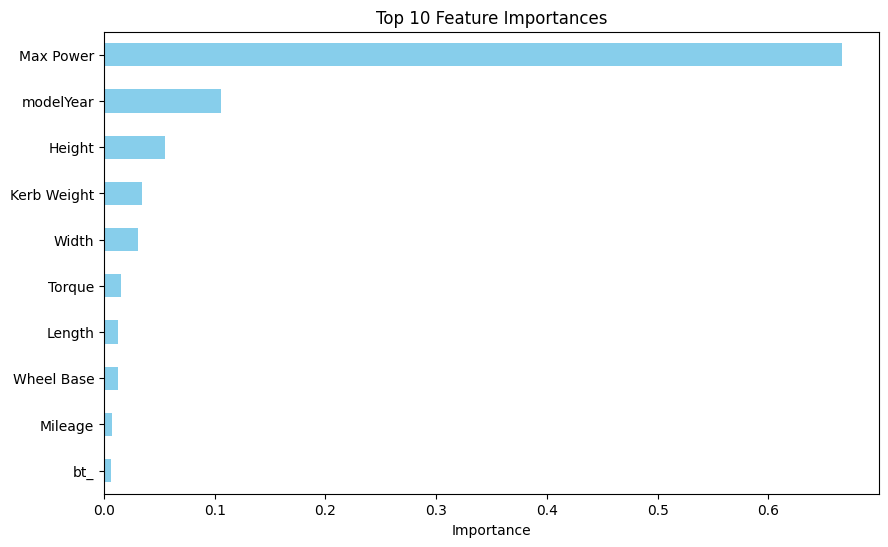

In [40]:
#Feature Importance Analysis

import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_scaled.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the top 10 features
feature_importances.head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()


In [41]:
## Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

# Fit to the training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R² Score: 0.8186886368269639


In [42]:
import pickle
with open('Models\\random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
with open('Models\\scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('Models\\onehot_encoder.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)


In [43]:
X_train = pd.read_csv('DATA SET\\X_train.csv') 

In [44]:
X_train.head()

,ft,bt,km,ownerNo,oem,modelYear,Insurance Validity,Transmission,Mileage,Engine,Torque,Color,No of Cylinder,Values per Cylinder,Length,Width,Height,Wheel Base,Kerb Weight,Gear Box,Seating Capacity,Steering Type,Tyre Type,No Door Numbers,city,Max Power
0,Petrol,SUV,24000,1,Hyundai,2021,Comprehensive,Manual,19.305221,1497.0,143.0,Black,4.0,4.0,4300.0,1790.0,1635.0,2610.0,1305.0,6 Speed,5,Power,Tubeless Radial,5,delhi,113.0
1,Diesel,SUV,80000,2,Mahindra,2015,Comprehensive,Manual,18.490000,1493.0,240.0,Silver,3.0,2.0,3995.0,1835.0,1826.0,2680.0,1725.0,5 Speed,7,Power,Tubeless Radial,5,bangalore,100.0
2,Diesel,MUV,69000,1,Toyota,2018,Comprehensive,Automatic,11.360000,2755.0,360.0,Brown,4.0,4.0,4735.0,1830.0,1795.0,2750.0,1830.0,6 Speed,7,Power,Tubeless Radial,5,delhi,171.0
3,Petrol,Sedan,40000,1,Maruti,2022,Third Party,Manual,22.410000,1197.0,113.0,Others,4.0,4.0,3995.0,1735.0,1515.0,2450.0,880.0,5 Speed,5,Electric,Tubeless Radial,4,hyderabad,88.0
4,Diesel,SUV,50000,2,Maruti,2018,Third Party,Manual,24.300000,1248.0,200.0,Red,4.0,4.0,3995.0,1790.0,1640.0,2500.0,1210.0,5 Speed,5,Power,Tubeless Radial,5,bangalore,88.0


In [45]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ft                   6695 non-null   object 
 1   bt                   6691 non-null   object 
 2   km                   6695 non-null   int64  
 3   ownerNo              6695 non-null   int64  
 4   oem                  6695 non-null   object 
 5   modelYear            6695 non-null   int64  
 6   Insurance Validity   6695 non-null   object 
 7   Transmission         6695 non-null   object 
 8   Mileage              6695 non-null   float64
 9   Engine               6695 non-null   float64
 10  Torque               6695 non-null   float64
 11  Color                6695 non-null   object 
 12  No of Cylinder       6695 non-null   float64
 13  Values per Cylinder  6695 non-null   float64
 14  Length               6695 non-null   float64
 15  Width                6695 non-null   f

In [46]:
print("Expected features:", X_train.columns)

Expected features: Index(['ft', 'bt', 'km', 'ownerNo', 'oem', 'modelYear', 'Insurance Validity',
       'Transmission', 'Mileage', 'Engine', 'Torque', 'Color',
       'No of Cylinder', 'Values per Cylinder', 'Length', 'Width', 'Height',
       'Wheel Base', 'Kerb Weight', 'Gear Box', 'Seating Capacity',
       'Steering Type', 'Tyre Type', 'No Door Numbers', 'city', 'Max Power'],
      dtype='object')


In [47]:
OneHotEncoding_columns

['ft', 'bt', 'oem', 'Insurance Validity', 'Transmission', 'Gear Box', 'city']

In [48]:
label_encoding_columns

['Engine', 'No of Cylinder', 'Seating Capacity', 'ownerNo', 'modelYear']